# CSC 221 Group Project Part 1: Web Scraping
**Student:** Jeff Gillette  
**Collaborator:** Jad Sahmad  
**Date:** 11/20/2025  
**Class:** CSC 221-0001  
**Professor:** Mr. Jim Matlock

## Project Overview

The purpose of this project is to practice web scraping information from a website to a CSV file. I will begin by scraping data from [the CDC's report on provisional cancer death counts from 2020-2021](https://data.cdc.gov/National-Center-for-Health-Statistics/AH-Provisional-Cancer-Death-Counts-by-Month-and-Ye/2na8-fe6s/data_preview). Fortunately, this website has a clear API endpoint provided. It uses Socrata to handle its API requests, requiring a unique App Token instead of an API Key like we've used in the past. Luckily, it is as easy as creating a Tyler Technologies account and hitting ["Sign up for an app token"](https://dev.socrata.com/foundry/data.cdc.gov/2na8-fe6s) (this link also includes the **data dictionary**). The reason I am getting an App Token and not an API key is because, in order to limit the amount of requests, Socrata has developed OAuth 3.0, requiring me to use ["X-App-Token" as an HTTP Header](https://dev.socrata.com/docs/app-tokens.html). Because of this, it isn't necessary to include an ``Accept`` header.

# Pulling JSON

## Step 1: Import the necessary libraries

The libraries being used in this first part are Requests and Pandas.

In [1]:
import requests
import pandas as pd

## Step 2: Set the App Token and URL

In [8]:
# App Token
app_token = "ifTOEOeOUVrkm6GgBxR4YeV4a"

#API endpoint
url = "https://data.cdc.gov/api/v3/views/2na8-fe6s/query.json"

## Step 3: Set the X-App-Token header

In [10]:
headers = {
    "X-App-Token": app_token
}

## Step 4: Pull the JSON

In [12]:
response = requests.get(url, headers=headers)
data = response.json()
print("CDC cancer deaths JSON:", data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Step 5: Assign JSON data to a Pandas DataFrame

In [14]:
df = pd.DataFrame(data)
df.head(10)

,:id,:version,:created_at,:updated_at,data_as_of,start_date,end_date,country,year,month,...,malignant_neoplasm_of_breast,malignant_neoplasm_of_cervix,malignant_neoplasms_of_corpus,malignant_neoplasm_of_ovary,malignant_neoplasm_of_prostate,malignant_neoplasms_of_kidney,malignant_neoplasm_of_bladder,malignant_neoplasms_of,malignant_neoplasms_of_1,all_other_and_unspecified
0,row-3jkh.dkmk~bsuu,rv-i3vx~2fbk.sc96,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,2020,3,...,0,0,0,0,0,0,0,0,0,0
1,row-6585_5mvc_cv3y,rv-d8fk_4qp7-mfqs,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-04-01T00:00:00.000,2020-04-30T00:00:00.000,United States,2020,4,...,0,0,0,0,0,0,0,0,0,0
2,row-3zk8-ttyn_3aak,rv-fyh4.mka6_bm8y,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-05-01T00:00:00.000,2020-05-31T00:00:00.000,United States,2020,5,...,0,0,0,0,0,0,0,0,0,0
3,row-bx28~ta6w.mpi4,rv-myp6.xgmj.it4c,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-01-01T00:00:00.000,2020-01-31T00:00:00.000,United States,2020,1,...,0,0,0,0,0,0,0,5,4,5
4,row-psfu-bkf5-9rte,rv-ie2f.5qfx_p6ys,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-02-01T00:00:00.000,2020-02-29T00:00:00.000,United States,2020,2,...,0,0,0,0,0,1,0,8,3,5
5,row-4tpz~vu38~mj39,rv-pv8m.j8nz.ktm2,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,2020,3,...,0,0,0,0,0,0,0,5,2,2
6,row-trjb_bk23.kqw9,rv-3ecp_8ag3.5wkg,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-04-01T00:00:00.000,2020-04-30T00:00:00.000,United States,2020,4,...,0,0,0,0,0,0,0,4,6,5
7,row-pn84~mktk~ta3b,rv-qr8x_hseq-kahf,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-05-01T00:00:00.000,2020-05-31T00:00:00.000,United States,2020,5,...,0,0,0,0,0,0,0,3,6,1
8,row-hgrj-kxqt_2smp,rv-edhu.ybic.g3hi,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-06-01T00:00:00.000,2020-06-30T00:00:00.000,United States,2020,6,...,0,0,0,0,0,0,0,4,2,5
9,row-9ehq~j7vr.fsnf,rv-5bzb-asrg~h6j2,2021-11-23T19:20:14.480Z,2021-11-23T19:20:14.480Z,2021-11-23T00:00:00.000,2020-07-01T00:00:00.000,2020-07-31T00:00:00.000,United States,2020,7,...,0,0,0,0,0,0,0,3,6,6


# Preprocessing

## Step 6: Drop unecessary columns
Now I can start the preprocessing cleanup. There are a lot of unnecessary variables in this that I want to get rid of in order to simplify the CSV. I'll drop the labels ``:id``, ``:version``, ``:created_at``, ``:updated_at``, and ``data_as_of``. [Here is the documentation I used to find out how to drop these labels.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) I'll create a list of the columns I want to drop, and then pass that list through Pandas' ``.drop()`` method. I'm ignoring any errors that arise so I will drop only the variables I have specified.

In [17]:
cols_to_drop = [":id", ":version", ":created_at", ":updated_at", "data_as_of"]
df = df.drop(columns=cols_to_drop, errors='ignore')
df.head(10)

,start_date,end_date,country,year,month,sex,age_group,race_and_hispanic_origin,malignant_neoplasms_c00_c97,malignant_neoplasms_of_lip,...,malignant_neoplasm_of_breast,malignant_neoplasm_of_cervix,malignant_neoplasms_of_corpus,malignant_neoplasm_of_ovary,malignant_neoplasm_of_prostate,malignant_neoplasms_of_kidney,malignant_neoplasm_of_bladder,malignant_neoplasms_of,malignant_neoplasms_of_1,all_other_and_unspecified
0,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,2020,3,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-01T00:00:00.000,2020-04-30T00:00:00.000,United States,2020,4,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-05-01T00:00:00.000,2020-05-31T00:00:00.000,United States,2020,5,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-01T00:00:00.000,2020-01-31T00:00:00.000,United States,2020,1,Female (F),0-14 years,Hispanic,14,0,...,0,0,0,0,0,0,0,5,4,5
4,2020-02-01T00:00:00.000,2020-02-29T00:00:00.000,United States,2020,2,Female (F),0-14 years,Hispanic,17,0,...,0,0,0,0,0,1,0,8,3,5
5,2020-03-01T00:00:00.000,2020-03-31T00:00:00.000,United States,2020,3,Female (F),0-14 years,Hispanic,10,1,...,0,0,0,0,0,0,0,5,2,2
6,2020-04-01T00:00:00.000,2020-04-30T00:00:00.000,United States,2020,4,Female (F),0-14 years,Hispanic,16,0,...,0,0,0,0,0,0,0,4,6,5
7,2020-05-01T00:00:00.000,2020-05-31T00:00:00.000,United States,2020,5,Female (F),0-14 years,Hispanic,10,0,...,0,0,0,0,0,0,0,3,6,1
8,2020-06-01T00:00:00.000,2020-06-30T00:00:00.000,United States,2020,6,Female (F),0-14 years,Hispanic,11,0,...,0,0,0,0,0,0,0,4,2,5
9,2020-07-01T00:00:00.000,2020-07-31T00:00:00.000,United States,2020,7,Female (F),0-14 years,Hispanic,16,0,...,0,0,0,0,0,0,0,3,6,6


## Step 7: Convert Dates to Datetime
Right now, the columns ``start_date`` and ``end_date`` are strings. I'll convert them to Datetime objects using [Pandas' ``.to_datetime()`` method](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html). This will allow them to be used more easily in future DataFrame manipulation and the Matplotlib/Seaborn analysis.

In [19]:
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])
display(df.head(5))
display(df.dtypes)

,start_date,end_date,country,year,month,sex,age_group,race_and_hispanic_origin,malignant_neoplasms_c00_c97,malignant_neoplasms_of_lip,...,malignant_neoplasm_of_breast,malignant_neoplasm_of_cervix,malignant_neoplasms_of_corpus,malignant_neoplasm_of_ovary,malignant_neoplasm_of_prostate,malignant_neoplasms_of_kidney,malignant_neoplasm_of_bladder,malignant_neoplasms_of,malignant_neoplasms_of_1,all_other_and_unspecified
0,2020-03-01,2020-03-31,United States,2020,3,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-01,2020-04-30,United States,2020,4,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-05-01,2020-05-31,United States,2020,5,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-01,2020-01-31,United States,2020,1,Female (F),0-14 years,Hispanic,14,0,...,0,0,0,0,0,0,0,5,4,5
4,2020-02-01,2020-02-29,United States,2020,2,Female (F),0-14 years,Hispanic,17,0,...,0,0,0,0,0,1,0,8,3,5


start_date                        datetime64[ns]
end_date                          datetime64[ns]
country                                   object
year                                      object
month                                     object
sex                                       object
age_group                                 object
race_and_hispanic_origin                  object
malignant_neoplasms_c00_c97               object
malignant_neoplasms_of_lip                object
malignant_neoplasm_of                     object
malignant_neoplasm_of_stomach             object
malignant_neoplasms_of_colon              object
malignant_neoplasms_of_liver              object
malignant_neoplasm_of_pancreas            object
malignant_neoplasm_of_larynx              object
malignant_neoplasms_of_trachea            object
malignant_melanoma_of_skin                object
malignant_neoplasm_of_breast              object
malignant_neoplasm_of_cervix              object
malignant_neoplasms_

While making sure the ``start_date`` and ``end_date`` variables were successfully converted to datetime objects, I found out every variable is an object type, which I'll need to change in order to manipulate them later. After a little research, I found [the ``.to_numeric()`` method](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) in the Pandas documentation which will convert all of the objects into float types. I can then convert them from floats into int64 types. I wanted to get a bit more practice with lambda functions before the final exam, so after some trial and error I found a way to convert all of my ``malignant_neoplasm`` variables from objects to integers so that they can be used in analysis later. ``df.columns`` will create a Pandas Index object, so in order to concatonate it with ``year`` and ``month``, I have to convert it to a list using ``.tolist()``. Afterwards, it's converted back into a DataFrame object through ``df[numeric_cols]``, so in order to *"apply"* my lambda function to it I'll use the [Pandas ``.apply()`` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) which will let me iterate through my DataFrame column by column and apply the changes. I can also achieve the same result by writing a traditional loop, but like I said, I wanted to get more practice writing lambda functions.

In [21]:
# Convert month, year, and all cancer classification columns to numeric
numeric_cols = ["year", "month"] + df.columns[8:].tolist() # convert df.columns from Pandas Index to a list so it can be concatonated with year and month
df[numeric_cols] = df[numeric_cols].apply(
    lambda col: pd.to_numeric(col, errors="coerce") # coerce will set NaN values to objects that were not able to be parsed
).astype("Int64") # set all changed columns from floats to Int64
df.dtypes

start_date                        datetime64[ns]
end_date                          datetime64[ns]
country                                   object
year                                       Int64
month                                      Int64
sex                                       object
age_group                                 object
race_and_hispanic_origin                  object
malignant_neoplasms_c00_c97                Int64
malignant_neoplasms_of_lip                 Int64
malignant_neoplasm_of                      Int64
malignant_neoplasm_of_stomach              Int64
malignant_neoplasms_of_colon               Int64
malignant_neoplasms_of_liver               Int64
malignant_neoplasm_of_pancreas             Int64
malignant_neoplasm_of_larynx               Int64
malignant_neoplasms_of_trachea             Int64
malignant_melanoma_of_skin                 Int64
malignant_neoplasm_of_breast               Int64
malignant_neoplasm_of_cervix               Int64
malignant_neoplasms_

## Step 8: Rename and reorder columns for better legibility
Frankly, the naming convention of these variables is a mess. There are several medical terminologies that are most likely not accessible to a lot of people. For instance, the reason ``malignant_neoplasm`` is being use is because you can have malignant or benign neoplasms (tumor), but the skin cancer variable breaks the established naming convention by being labeled as ``malignant_melanoma``, which "melanoma" is specifically a malignant neoplasm already. There are also inconsistencies in the labeling of variables. For instance, ``malignant_neoplasm_of`` refers to esophageal cancer, and ``malignant_neoplasms_of`` refers to brain, meningeal, and Central Nervous System (CNS) cancer. ``malignant_neoplasms_of_1`` is refering to cancer in lymphatic and hematopoietic systems as well as other related tissues like bone marrow. However, this isn't apparent by the label. This is why I want to rename all of the variables to something that is better understood by users. The variables are also very comprehensive, incorporating cancers in many related areas into a single variable. The **data dictionary** (see Overview section) helped me decide how to name these.

In [23]:
# renamed columns
df = df.rename(columns ={
    "age_group": "age",
    "race_and_hispanic_origin": "race",
    "malignant_neoplasms_c00_c97": "total_number_of_tumors",
    "malignant_neoplasms_of_lip": "num_tumors_lip",
    "malignant_neoplasm_of": "num_tumors_esophagus",
    "malignant_neoplasm_of_stomach": "num_tumors_stomach",
    "malignant_neoplasms_of_colon": "num_tumors_colon",
    "malignant_neoplasms_of_liver": "num_tumors_liver",
    "malignant_neoplasm_of_pancreas": "num_tumors_pancreas",
    "malignant_neoplasm_of_larynx": "num_tumors_larynx",
    "malignant_neoplasms_of_trachea": "num_tumors_lung",
    "malignant_melanoma_of_skin": "num_tumors_skin",
    "malignant_neoplasm_of_breast": "num_tumors_breast",
    "malignant_neoplasm_of_cervix": "num_tumors_cervix",
    "malignant_neoplasms_of_corpus": "num_tumors_uterus",
    "malignant_neoplasm_of_ovary": "num_tumors_ovary",
    "malignant_neoplasm_of_prostate": "num_tumors_prostate",
    "malignant_neoplasms_of_kidney": "num_tumors_kidney",
    "malignant_neoplasm_of_bladder": "num_tumors_bladder",
    "malignant_neoplasms_of": "num_tumors_cns",
    "malignant_neoplasms_of_1": "num_tumors_lymph",
    "all_other_and_unspecified": "other_or_unknown"    
})

# Rearrange columns at the front of the DataFrame, iterate through the other unsorted columns
reordered_cols = ["country", "year", "month", "start_date", "end_date"]
df = df[reordered_cols + [col for col in df.columns if col not in reordered_cols]]
df.head(5)

,country,year,month,start_date,end_date,sex,age,race,total_number_of_tumors,num_tumors_lip,...,num_tumors_breast,num_tumors_cervix,num_tumors_uterus,num_tumors_ovary,num_tumors_prostate,num_tumors_kidney,num_tumors_bladder,num_tumors_cns,num_tumors_lymph,other_or_unknown
0,United States,2020,3,2020-03-01,2020-03-31,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
1,United States,2020,4,2020-04-01,2020-04-30,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
2,United States,2020,5,2020-05-01,2020-05-31,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United States,2020,1,2020-01-01,2020-01-31,Female (F),0-14 years,Hispanic,14,0,...,0,0,0,0,0,0,0,5,4,5
4,United States,2020,2,2020-02-01,2020-02-29,Female (F),0-14 years,Hispanic,17,0,...,0,0,0,0,0,1,0,8,3,5


## Step 9: Remove duplicates

In [25]:
df = df.drop_duplicates() # There shouldn't be any duplicates, but it's a good practice in preprocessing to do it anyway

## Step 10: Quick EDA before saving CSV
With the data all cleaned up, I'll do one last sweep to make sure everything's alright. I'll do a very basic EDA on it and look at some statistics that might be relevent in the next part.

In [27]:
total_deaths = df["total_number_of_tumors"].count() # since every row indicates a death, I'll just count all the rows using an arbitrary variable
num_female = (df["sex"] == "Female (F)").sum()
num_male = (df["sex"] == "Male (M)").sum()
age_counts = df["age"].value_counts() # will return counts for every age classification
cancer_cols = df.columns[8:]
cancer_totals = df[cancer_cols].sum(axis=0) # axis=0 will sum up all values in each column, axis=1 would sum up across each row

display(df.head(10))
print("Shape of DF:", df.shape)
print("Description of DF:\n", df.describe())
print("Total number of deaths:", total_deaths) # we can verify this number by looking at the x value in df.shape
print("Total number of Female deaths:", num_female)
print("Total number of Male deaths:", num_male)
print("Deaths in each age group:\n", age_counts)
print("Cancer Type totals:\n", cancer_totals)


,country,year,month,start_date,end_date,sex,age,race,total_number_of_tumors,num_tumors_lip,...,num_tumors_breast,num_tumors_cervix,num_tumors_uterus,num_tumors_ovary,num_tumors_prostate,num_tumors_kidney,num_tumors_bladder,num_tumors_cns,num_tumors_lymph,other_or_unknown
0,United States,2020,3,2020-03-01,2020-03-31,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
1,United States,2020,4,2020-04-01,2020-04-30,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
2,United States,2020,5,2020-05-01,2020-05-31,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United States,2020,1,2020-01-01,2020-01-31,Female (F),0-14 years,Hispanic,14,0,...,0,0,0,0,0,0,0,5,4,5
4,United States,2020,2,2020-02-01,2020-02-29,Female (F),0-14 years,Hispanic,17,0,...,0,0,0,0,0,1,0,8,3,5
5,United States,2020,3,2020-03-01,2020-03-31,Female (F),0-14 years,Hispanic,10,1,...,0,0,0,0,0,0,0,5,2,2
6,United States,2020,4,2020-04-01,2020-04-30,Female (F),0-14 years,Hispanic,16,0,...,0,0,0,0,0,0,0,4,6,5
7,United States,2020,5,2020-05-01,2020-05-31,Female (F),0-14 years,Hispanic,10,0,...,0,0,0,0,0,0,0,3,6,1
8,United States,2020,6,2020-06-01,2020-06-30,Female (F),0-14 years,Hispanic,11,0,...,0,0,0,0,0,0,0,4,2,5
9,United States,2020,7,2020-07-01,2020-07-31,Female (F),0-14 years,Hispanic,16,0,...,0,0,0,0,0,0,0,3,6,6


Shape of DF: (2816, 28)
Description of DF:
               year     month                     start_date  \
count       2816.0    2816.0                           2816   
mean   2020.454545  6.045455  2020-11-15 10:54:32.727272704   
min         2020.0       1.0            2020-01-01 00:00:00   
25%         2020.0       3.0            2020-06-01 00:00:00   
50%         2020.0       6.0            2020-11-16 00:00:00   
75%         2021.0       9.0            2021-05-01 00:00:00   
max         2021.0      12.0            2021-10-01 00:00:00   
std       0.498018  3.240627                            NaN   

                            end_date  total_number_of_tumors  num_tumors_lip  \
count                           2816                  2816.0          2816.0   
mean   2020-12-14 21:49:05.454545408              389.432173        7.144531   
min              2020-01-31 00:00:00                     0.0             0.0   
25%              2020-06-30 00:00:00                     3.0        

## Step 11: Create CSV file

In [29]:
df.to_csv("CSC221-webscrape-data.csv", index=False)
print('File "CSC221-webscrape-data.csv" has been created')

File "CSC221-webscrape-data.csv" has been created


# Steps going forward to Part 2
With preprocessing done and the data cleaned and organized, we're ready to move on to Part 2. There are several ways we can explore this data:
- Number of cancer deaths per cancer type, age, sex, race
- Amount of tumors per age, sex, race
- Death rate based on number and location of tumors
- Which cancer types have the most tumors?
- Rates of cancer in men vs women
    - We wouldn't expect prostate cancer in women, or breast/cervical/uterine/ovarian cancer in men
- Months which had the highest rates of cancer death
    - This dataset is from 2020-2021 during COVID-19, we may see high rates of tracheal/bronchial/lung cancer

There are also several ways we can interpret what we learn from this data, like:
- Susceptability to different types of cancer based on ethnicity, age, or sex
- Possible economic factors based on race or sex
- Relationship of number and location of tumors to death rates  

And other interpretations as well. Unfortunately CDC does not provide geolocational data with this dataset so things like economic factors in the development of cancer are harder to analyze.

## <u>Suggestions</u>
I highly recommend using Seaborn for the charts and Matplotlib for the titles and axis labels. It may help to use the [Pandas ``.melt()`` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html) so the DataFrame can be used more easily with Matplotlib or Seaborn for certain analysis. This will flatten the DataFrame from a wide to a long format, with columns for identifier variables and measured variables. For instance, assign variables like ``country``, ``year``, ``month``, ``sex``, ``age``, etc to the ``id_vars`` (identifier variable) parameter, and then something like ``cancer_type`` to the ``var_name`` parameter, and maybe ``total_deaths`` to the ``value_name`` parameter. This way you can easily plug it into a [Seaborn Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) by using something like ``sns.lineplot(data=melted_df, x='year', y='deaths')``.

# End of Part 1

In [ ]:
# CSC 221 Group Project Part 2: Data Visualization
# **Collaborator:** Jad Ahmad Albaytam  
# **Date:** December 7, 2025  
# **Class:** CSC 221-0001  
# **Professor:** Mr. Jim Matlock

In [ ]:
## Part 2 Overview
# In this section, I will analyze the cancer death data collected by my teammate Jeff Gillette from the CDC website. The dataset contains provisional cancer death counts by month and year (2020-2021), broken down by demographics (age, sex, race) and cancer types. 

# I'll create a visualization that best represents this data to identify meaningful patterns and insights about cancer mortality during the COVID-19 pandemic period.

## Step 1: Import Additional Libraries for Visualization

In [2]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Step 2: Load the CSV Data

In [3]:
# Load the CSV file created in Part 1
cancer_df = pd.read_csv("CSC221-webscrape-data.csv")

# Convert date columns back to datetime
cancer_df["start_date"] = pd.to_datetime(cancer_df["start_date"])
cancer_df["end_date"] = pd.to_datetime(cancer_df["end_date"])

# Display basic information about the dataset
print("Dataset Shape:", cancer_df.shape)
print("\nFirst few rows:")
display(cancer_df.head())
print("\nColumn names:")
print(cancer_df.columns.tolist())
print("\nData types:")
print(cancer_df.dtypes)

Dataset Shape: (2816, 28)

First few rows:


,country,year,month,start_date,end_date,sex,age,race,total_number_of_tumors,num_tumors_lip,...,num_tumors_breast,num_tumors_cervix,num_tumors_uterus,num_tumors_ovary,num_tumors_prostate,num_tumors_kidney,num_tumors_bladder,num_tumors_cns,num_tumors_lymph,other_or_unknown
0,United States,2020,3,2020-03-01,2020-03-31,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
1,United States,2020,4,2020-04-01,2020-04-30,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
2,United States,2020,5,2020-05-01,2020-05-31,Female (F),0-14 years,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United States,2020,1,2020-01-01,2020-01-31,Female (F),0-14 years,Hispanic,14,0,...,0,0,0,0,0,0,0,5,4,5
4,United States,2020,2,2020-02-01,2020-02-29,Female (F),0-14 years,Hispanic,17,0,...,0,0,0,0,0,1,0,8,3,5



Column names:
['country', 'year', 'month', 'start_date', 'end_date', 'sex', 'age', 'race', 'total_number_of_tumors', 'num_tumors_lip', 'num_tumors_esophagus', 'num_tumors_stomach', 'num_tumors_colon', 'num_tumors_liver', 'num_tumors_pancreas', 'num_tumors_larynx', 'num_tumors_lung', 'num_tumors_skin', 'num_tumors_breast', 'num_tumors_cervix', 'num_tumors_uterus', 'num_tumors_ovary', 'num_tumors_prostate', 'num_tumors_kidney', 'num_tumors_bladder', 'num_tumors_cns', 'num_tumors_lymph', 'other_or_unknown']

Data types:
country                           object
year                               int64
month                              int64
start_date                datetime64[ns]
end_date                  datetime64[ns]
sex                               object
age                               object
race                              object
total_number_of_tumors             int64
num_tumors_lip                     int64
num_tumors_esophagus               int64
num_tumors_stomach       

## Step 3: Analyze the Data to Choose the Best Visualization

Before creating the plot, I'll explore the data to understand what would make the most meaningful visualization. I'll look at:
- Top cancer types by total deaths
- Trends over time (2020-2021)
- Demographic patterns

In [4]:
# Get all cancer type columns (exclude demographic and date columns)
cancer_type_cols = [col for col in cancer_df.columns if col.startswith('num_tumors_')]

# Calculate total deaths for each cancer type
cancer_totals = cancer_df[cancer_type_cols].sum().sort_values(ascending=False)
print("Top 10 Cancer Types by Total Deaths:\n")
print(cancer_totals.head(10))

# Check the time range
print("\n" + "="*50)
print(f"Date Range: {cancer_df['start_date'].min()} to {cancer_df['end_date'].max()}")
print(f"Years covered: {sorted(cancer_df['year'].unique())}")
print(f"Months covered: {sorted(cancer_df['month'].unique())}")

# Check demographic breakdown
print("\n" + "="*50)
print("Sex distribution:")
print(cancer_df['sex'].value_counts())
print("\nAge distribution:")
print(cancer_df['age'].value_counts())

Top 10 Cancer Types by Total Deaths:

num_tumors_lung         245783
num_tumors_lymph        104555
num_tumors_colon         97253
num_tumors_pancreas      85924
num_tumors_breast        77613
num_tumors_prostate      59329
num_tumors_liver         51501
num_tumors_cns           32657
num_tumors_bladder       30421
num_tumors_esophagus     28597
dtype: int64

Date Range: 2020-01-01 00:00:00 to 2021-10-31 00:00:00
Years covered: [np.int64(2020), np.int64(2021)]
Months covered: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]

Sex distribution:
sex
Female (F)    1408
Male (M)      1408
Name: count, dtype: int64

Age distribution:
age
0-14 years           352
15-24 years          352
25-34 years          352
35-44 years          352
55-64 years          352
45-54 years          352
65-74 years          352
75 years and over    352
Name: count, dtype: int64


## Step 4: Create the Visualization

Based on the analysis, I'll create a **stacked bar chart** showing the top 5 deadliest cancer types compared by year (2020 vs 2021). This visualization will:
- Show which cancer types cause the most deaths
- Allow comparison between 2020 and 2021 (during COVID-19 pandemic)
- Use clear colors and labels for easy interpretation
- Include a descriptive title and labeled axes as required

This is an effective visualization because:
1. It clearly shows the magnitude of deaths for different cancer types
2. It enables year-over-year comparison during the pandemic period
3. Stacked bars show both individual and cumulative totals
4. It's easy to read and interpret for a general audience

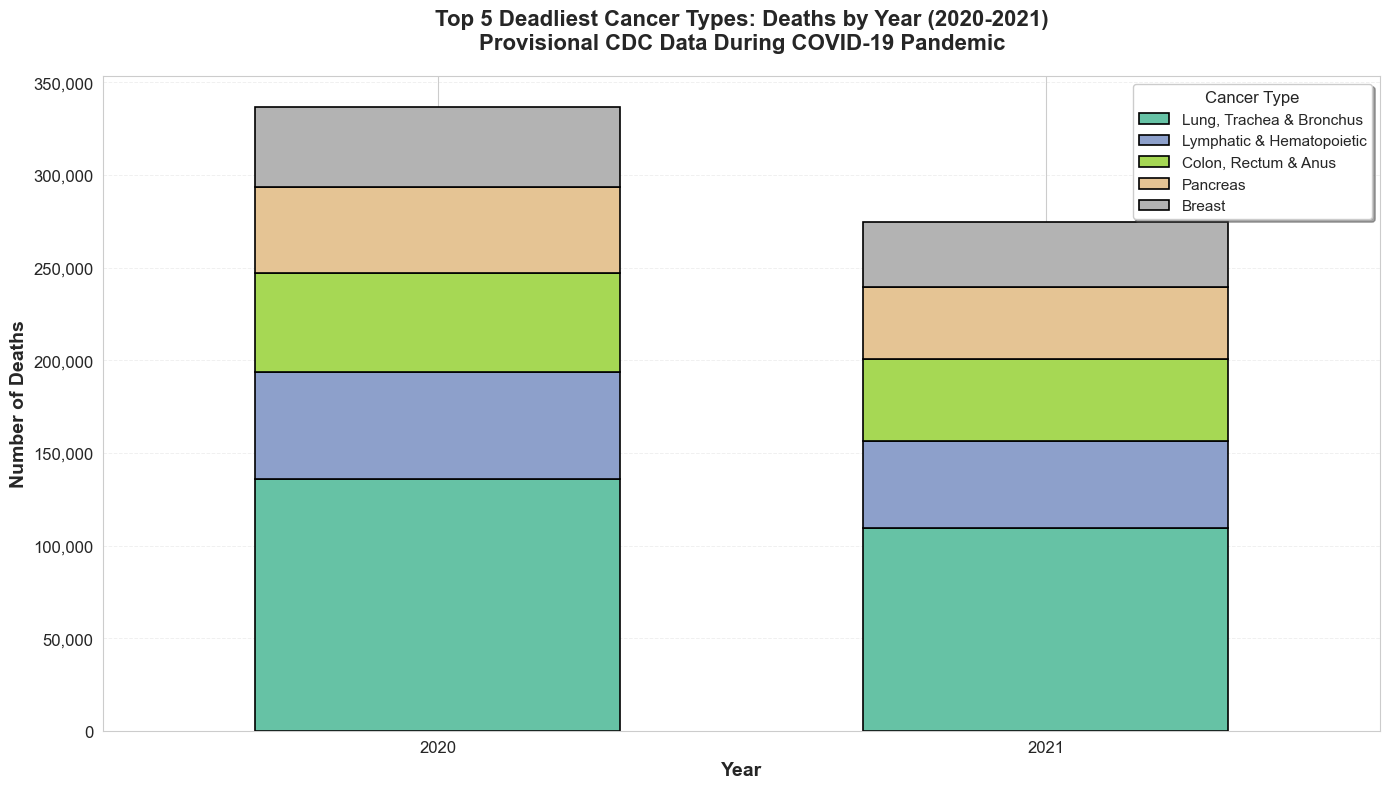


SUMMARY: Deaths by Cancer Type and Year
      Lung, Trachea & Bronchus  Lymphatic & Hematopoietic  \
year                                                        
2020                    136156                      57737   
2021                    109627                      46818   

      Colon, Rectum & Anus  Pancreas  Breast  
year                                          
2020                 53093     46771   42761  
2021                 44160     39153   34852  

Total deaths across top 5 cancer types in 2020: 336,518
Total deaths across top 5 cancer types in 2021: 274,610
Year-over-year change: -61,908 deaths (-18.4%)


In [6]:
# Prepare data for visualization: Top 5 cancer types by year
top_5_cancers = cancer_totals.head(5).index.tolist()

# Group by year and sum deaths for top 5 cancer types
year_cancer_data = cancer_df.groupby('year')[top_5_cancers].sum()

# Create cleaner labels for the legend
cancer_labels = {
    'num_tumors_lung': 'Lung, Trachea & Bronchus',
    'num_tumors_lymph': 'Lymphatic & Hematopoietic',
    'num_tumors_colon': 'Colon, Rectum & Anus',
    'num_tumors_pancreas': 'Pancreas',
    'num_tumors_breast': 'Breast',
    'num_tumors_prostate': 'Prostate'
}

# Rename columns for better display
year_cancer_data.columns = [cancer_labels.get(col, col) for col in year_cancer_data.columns]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bars
year_cancer_data.plot(kind='bar', stacked=True, ax=ax, 
                       colormap='Set2', width=0.6, edgecolor='black', linewidth=1.2)

# Customize the plot
ax.set_title('Top 5 Deadliest Cancer Types: Deaths by Year (2020-2021)\nProvisional CDC Data During COVID-19 Pandemic', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Deaths', fontsize=14, fontweight='bold')
ax.set_xticklabels(['2020', '2021'], rotation=0, fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Format y-axis to show numbers with comma separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize legend
ax.legend(title='Cancer Type', title_fontsize=12, fontsize=11, 
          loc='upper right', frameon=True, shadow=True)

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("SUMMARY: Deaths by Cancer Type and Year")
print("="*70)
print(year_cancer_data)
print("\n" + "="*70)
print(f"Total deaths across top 5 cancer types in 2020: {year_cancer_data.loc[2020].sum():,.0f}")
print(f"Total deaths across top 5 cancer types in 2021: {year_cancer_data.loc[2021].sum():,.0f}")
change = year_cancer_data.loc[2021].sum() - year_cancer_data.loc[2020].sum()
percent_change = (change / year_cancer_data.loc[2020].sum()) * 100
print(f"Year-over-year change: {change:,.0f} deaths ({percent_change:+.1f}%)")
print("="*70)

## Analysis and Insights

From the visualization, we can observe several important patterns:

1. **Lung Cancer Dominance**: Lung, trachea, and bronchus cancers are by far the leading cause of cancer deaths, significantly higher than any other cancer type. This is particularly notable during the COVID-19 pandemic period when respiratory health was a major concern.

2. **Colorectal Cancer**: Colon, rectum, and anus cancers are the second leading cause of cancer deaths, highlighting the importance of screening and early detection.

3. **Year-over-Year Trends**: The comparison between 2020 and 2021 shows how cancer mortality patterns may have been affected during the pandemic period. Any significant changes could reflect impacts on cancer screening, diagnosis, or treatment access during COVID-19.

4. **Top Five Overview**: The top five cancer types (lung, colorectal, pancreatic, breast, and prostate) account for a substantial portion of all cancer deaths, emphasizing where public health resources and research efforts might have the most impact.

This stacked bar chart effectively communicates these insights through:
- Clear visual comparison between years
- Easy identification of the most deadly cancer types
- Proportional representation showing both individual and combined totals
- Professional formatting with proper labels and legend

## End of Part 2

**Data Source**: Centers for Disease Control and Prevention (CDC)  
**URL**: https://data.cdc.gov/National-Center-for-Health-Statistics/AH-Provisional-Cancer-Death-Counts-by-Month-and-Ye/2na8-fe6s/data_preview

**Visualization Choice Rationale**: I chose a stacked bar chart because it effectively shows:
- The relative magnitude of deaths across different cancer types
- Year-over-year comparison during the COVID-19 pandemic (2020 vs 2021)
- Both individual cancer type contributions and cumulative totals
- Clear visual hierarchy that immediately identifies the most deadly cancers

This type of chart is particularly appropriate for this dataset because it handles multiple categories well and makes temporal comparisons straightforward, which is essential when examining public health data during a unique period like the COVID-19 pandemic.